In [1]:
# Import packages 
import sys
sys.path.append('../Plotting/')
""" Now you can imprt modules in ../Plotting"""
import xyp_plot as xyp

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.tri as tri
import matplotlib.colors as colors
from scipy import interpolate as intr

#Models
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor


#Evaluation
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Some useful packages 
import importlib
import copy
import time


/project/amp/juliob/MiniConda/envs/adf_v0.07/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dir="/project/amp/juliob/ERAI/f09_omega/L58/2010/"
files="ERAI_fv09_L58.cam2.i.2010-07-*.nc"

dfils=dir + files

ds=xr.open_mfdataset( dfils , data_vars='different' , decode_times=False )

In [3]:
omega=ds['OMEGA'].values
lat=ds['lat'].values
lon=ds['lon'].values

In [4]:
print(np.shape(omega) , np.shape(lat) )

(124, 58, 192, 288) (192,)


In [5]:
dlat=np.abs( lat - 36.6 )
dlon=np.abs( lon - 270. )

In [6]:
j0 = np.argmin(dlat)
i0 = np.argmin(dlon)
print(lon[i0],lat[j0])
omegZT = omega[:,:,j0,i0]


270.0 36.282722513089


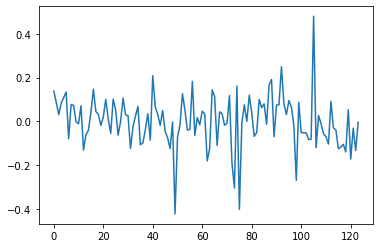

In [7]:
plt.plot(omegZT[:,45])

In [8]:
dir ='/project/amp/juliob/scam/archive/JP_Test_00_L58_270.0E_36.6N_2010-07-01/atm/hist/'
file ='JP_Test_00_L58_270.0E_36.6N_2010-07-01.cam.h0.2010-07-01-00000.nc'
dfile=dir+file
dsSCAM=xr.open_dataset( dfile )


In [9]:
Omg=dsSCAM['OMEGA'][180,:,0,0].values
Omgt57=dsSCAM['OMEGA'][:,57,0,0].values
Omgt45=dsSCAM['OMEGA'][:,45,0,0].values


In [10]:
G = np.shape(Omgt45)
timeSCAM=np.arange( G[0] )/192.
G = np.shape( omegZT )
time3D=np.arange( G[0] )/4.


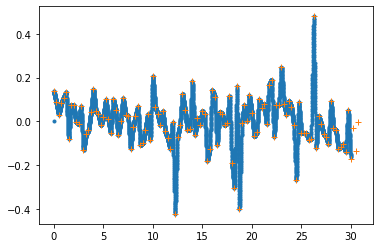

In [11]:
plt.plot(timeSCAM,Omgt45,'.')
plt.plot(time3D,omegZT[:,45] ,'+')


